# Continuous Control

In this short Notebook, I will show how my implementation of Actor-Critic manages to solve Unity's Reacher environment. This project was carried out as part as Udacity's DRL nanodegree and some of the code are inspired from examples of the course.  


In [1]:
#Import
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment! Before running the code cell below, change the file_name parameter to match the location of the Unity environment that you downloaded.

Mac: "path/to/Reacher.app"
Windows (x86): "path/to/Reacher_Windows_x86/Reacher.exe"
Windows (x86_64): "path/to/Reacher_Windows_x86_64/Reacher.exe"
Linux (x86): "path/to/Reacher_Linux/Reacher.x86"
Linux (x86_64): "path/to/Reacher_Linux/Reacher.x86_64"
Linux (x86, headless): "path/to/Reacher_Linux_NoVis/Reacher.x86"
Linux (x86_64, headless): "path/to/Reacher_Linux_NoVis/Reacher.x86_64"
For instance, if you are using a Mac, then you downloaded Reacher.app. If this file is in the same folder as the notebook, then the line below should appear as follows:

env = UnityEnvironment(file_name="Reacher.app")

In [2]:
env = UnityEnvironment(file_name='../Project/Reacher_Linux/Reacher.x86_64',no_graphics=False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


We will control the brains with Python

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Finally, let's have a look at the environment

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## Training

In [5]:
# Define the Actor and Critic Policy
from ddpg_agent import Agent
#Create an agent
agent = Agent(state_size=33, action_size=4, random_seed=2)

/home/romain/.conda/envs/DRL/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 5	Average Score: 0.14
Episode 10	Average Score: 0.41
Episode 15	Average Score: 0.66
Episode 20	Average Score: 1.03
Episode 25	Average Score: 1.33
Episode 30	Average Score: 1.53
Episode 35	Average Score: 1.89
Episode 40	Average Score: 2.76
Episode 45	Average Score: 3.11
Episode 50	Average Score: 3.32
Episode 55	Average Score: 4.49
Episode 60	Average Score: 4.60
Episode 65	Average Score: 4.65
Episode 70	Average Score: 5.04
Episode 75	Average Score: 5.50
Episode 80	Average Score: 5.32
Episode 85	Average Score: 5.38
Episode 90	Average Score: 5.89
Episode 95	Average Score: 6.07
Episode 100	Average Score: 5.46
Episode 105	Average Score: 6.05
Episode 110	Average Score: 6.00
Episode 115	Average Score: 5.62
Episode 120	Average Score: 6.08
Episode 125	Average Score: 6.34
Episode 130	Average Score: 6.03
Episode 135	Average Score: 5.90
Episode 140	Average Score: 6.07
Episode 145	Average Score: 6.08
Episode 150	Average Score: 5.72


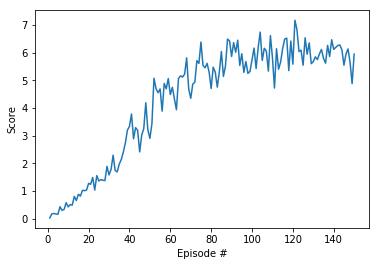

In [6]:
from collections import deque
import torch
import matplotlib.pyplot as plt
def ddpg(n_episodes=150, max_t=300, print_every=5):
    scores_deque = deque(maxlen=print_every)
    my_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations                  # get the current state (for each agent)
        #agent.reset()
        scores = np.zeros(num_agents)         # initialize the score (for each agent)
        for t in range(max_t):
            actions = agent.act(states)              # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states,actions,rewards,next_states,dones) #Memorize and learn
            scores += env_info.rewards                        # update the score (for each agent)
            states = next_states                               # roll over states to next time step            
            if np.any(dones):
                break 
        score=np.mean(scores)   
        scores_deque.append(score)
        my_scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return my_scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


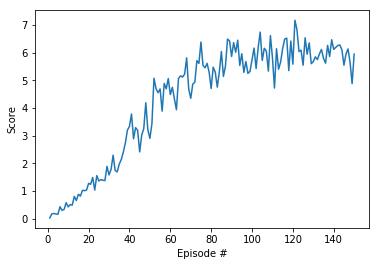

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [9]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations                  # get the current state (for each agent)
        #agent.reset()
scores = np.zeros(num_agents)         # initialize the score (for each agent)
for t in range(300):
    actions = agent.act(states,True)              # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    agent.step(states,actions,rewards,next_states,dones) #Memorize and learn
    scores += env_info.rewards                        # update the score (for each agent)
    states = next_states                               # roll over states to next time step            
    if np.any(dones):
        break 
print(np.mean(scores))   


/home/romain/.conda/envs/DRL/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


5.579499875288457
